# Conector MT5 - Python

## BitLink

### Autor: Javier Varón

In [37]:
# Importar todos los módulos que vamos a necesitar
import pandas as pd
import MetaTrader5 as mt5

In [38]:
# Creamos un diccionario con las credenciales a server MetaQuotes
creds =  {
    "path": "C:\\Program Files\\MetaTrader 5\\terminal64.exe",
    "login": 5031995506,
    "pass": "-5NbVgGq",
    "server": "MetaQuotes-Demo",
    "timeout": 60000,
    "portable": False
}

In [22]:
# Creamos un diccionario con las credenciales a server Darwinex
# creds =  {
#     "path": "C:\\Program Files\\Darwinex MetaTrader 5\\terminal64.exe",
#     "login": 3000073384,
#     "pass": "5V#D&@72803f",
#     "server": "Darwinex-Demo",
#     "timeout": 60000,
#     "portable": False
# }

In [39]:
creds['path']

'C:\\Program Files\\MetaTrader 5\\terminal64.exe'

In [40]:
# Conexion a MT5
if mt5.initialize(path=creds['path'], login=creds['login'], password=creds['pass'], server=creds['server'], timeout=creds['timeout'], portable=creds['portable']):
    print("plataforma MT5 lanzada correctamente")
else:
    print(f"Ha habido un problema en la inicialización: {mt5.last_error()}")

plataforma MT5 lanzada correctamente


### Informacion sobre el terminal

In [20]:
terminal_info_dict = mt5.terminal_info()._asdict()

In [21]:
terminal_info_df = pd.DataFrame(terminal_info_dict, index=[0])
terminal_info_df

,community_account,community_connection,connected,dlls_allowed,trade_allowed,tradeapi_disabled,email_enabled,ftp_enabled,notifications_enabled,mqid,...,codepage,ping_last,community_balance,retransmission,company,name,language,path,data_path,commondata_path
0,False,False,True,False,True,False,False,False,False,False,...,0,172866,0.0,0.181412,Tradeslide Trading Tech Limited,Darwinex MetaTrader 5,English,C:\Program Files\Darwinex MetaTrader 5,C:\Users\Nabucodonosor\AppData\Roaming\MetaQuo...,C:\Users\Nabucodonosor\AppData\Roaming\MetaQuo...


### Informacion de la cuenta

In [53]:
account_info_dict = mt5.account_info()._asdict()
account_info_dict['equity']

9999.15

In [35]:
account_info_df = pd.DataFrame(account_info_dict, index=[0])
account_info_df

,login,trade_mode,leverage,limit_orders,margin_so_mode,trade_allowed,trade_expert,margin_mode,currency_digits,fifo_close,...,margin_so_so,margin_initial,margin_maintenance,assets,liabilities,commission_blocked,name,server,currency,company
0,3000073384,0,200,400,0,True,True,2,2,False,...,50.0,0.0,0.0,0.0,0.0,0.0,Javox,Darwinex-Demo,EUR,Tradeslide Trading Tech Limited


In [ ]:
# Obtiene el profit de la cuenta
account_info_dict['profit']

-1.32

# Recuperacion de datos: Symbols

In [ ]:
# Obtiene el total de los simbolos
mt5.symbols_total()

886

In [26]:
# Filtramos los simbolos o uno en espesifico
mt5.symbols_get('*USD*')

(SymbolInfo(custom=False, chart_mode=0, select=False, visible=False, session_deals=0, session_buy_orders=0, session_sell_orders=0, volume=0, volumehigh=0, volumelow=0, time=0, digits=5, spread=0, spread_float=True, ticks_bookdepth=10, trade_calc_mode=0, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=1, swap_mode=1, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=7, filling_mode=1, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=0.0, bidhigh=0.0, bidlow=0.0, ask=0.0, askhigh=0.0, asklow=0.0, last=0.0, lasthigh=0.0, lastlow=0.0, volume_real=0.0, volumehigh_real=0.0, volumelow_real=0.0, option_strike=0.0, point=1e-05, trade_tick_value=1.0, trade_tick_value_profit=1.0, trade_tick_value_loss=1.0, trade_tick_size=1e-05, trade_contract_size=100000.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=0.01, volume_max=500.0, volume_step=0.01, volume_limit=0.0, sw

In [27]:
# Obtiene los simbolos que tengan la plabra USD
symbols = mt5.symbols_get('*USD*')

In [28]:
# Recorre los simbolos obtenidos
for symbol in symbols:
    print(symbol.name)

AUDUSD
EURUSD
GBPUSD
NZDUSD
USDARS
USDBRL
USDCAD
USDCHF
USDCLP
USDCNH
USDCOP
USDCRE
USDCZK
USDDKK
USDGEL
USDHKD
USDHUF
USDILS
USDJPY
USDMXN
USDNOK
USDPLN
USDRMB
USDRUB
USDRUR
USDSEK
USDSGD
USDTHB
USDTRY
USDZAR
XAUUSD
XAGUSD
XPDUSD
XPTUSD
USD
USDU
USDX


In [ ]:
# Obtener la información de un symbol
eurusd = mt5.symbol_info("EURUSD")._asdict()
eurusd['digits']

5

In [71]:
# Añadir symbols al MarketWatch
if mt5.symbol_select('EURJPY', True):
    print("Símbolo añadido correctamente")
else:
    print(f"Ha ocurrido un error añadiendo el símbolo: {mt5.last_error()}")

Símbolo añadido correctamente


In [ ]:
# Último precio de un símbolo en concreto:
tick = mt5.symbol_info_tick('EURUSD') # epoch / unix timestamp
tick.ask

1.05071

# Adquisición de datos : OHLC (Open High low Close)

In [33]:
from datetime import datetime
import pytz

In [34]:
symbol = "USDCOP"
timeframe = mt5.TIMEFRAME_H1

# Recuperamos datos desde una fecha determinada
date = datetime.strptime("2024-07-17 15:00:00", "%Y-%m-%d %H:%M:%S")

# La hora actual sin cambiarla hora en UTC
date = date.replace(tzinfo=pytz.utc)
date

datetime.datetime(2024, 7, 17, 15, 0, tzinfo=<UTC>)

In [ ]:
# CASO 1: Convertir mi zona horaria a UTC para que la relacion de mi hora actual se la hora en UTC correspondiente
# date.astimezone(pytz.utc)

datetime.datetime(2023, 7, 17, 20, 0, tzinfo=<UTC>)

In [ ]:
# CASO 2: La hora actual sin cambiarla convertida en UTC
# date.replace(tzinfo=pytz.utc)

datetime.datetime(2023, 7, 17, 15, 0, tzinfo=<UTC>)

In [35]:
# Vamos a recuperar los datos OHLC
raw_ohlc_data = mt5.copy_rates_from(symbol, timeframe, date, 10)
df =  pd.DataFrame(raw_ohlc_data)
# Editamos la columna time que esta en segundo par que quede en fecha, ya que esta en segundos epoch
df['time'] =  pd.to_datetime(df['time'], unit='s')
# df.set_index('time', inplace=True)

In [36]:
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2021-09-28 16:00:00,3841.69,3844.35,3841.69,3844.35,4,259,0
1,2021-09-28 17:00:00,3844.80,3846.75,3842.57,3844.56,37,227,0
2,2021-09-28 18:00:00,3844.53,3844.53,3840.45,3841.66,21,222,0
3,2021-09-28 19:00:00,3842.45,3842.45,3835.87,3836.35,33,204,0
4,2021-09-28 20:00:00,3835.88,3835.88,3832.26,3834.89,21,198,0
5,2021-09-29 00:00:00,3833.95,3833.95,3833.95,3833.95,1,204,0
6,2021-09-29 01:00:00,3833.03,3833.03,3833.03,3833.03,1,203,0
7,2021-09-29 13:00:00,3833.03,3833.03,3833.03,3833.03,1,203,0
8,2021-09-29 16:00:00,3833.49,3839.42,3832.51,3839.42,5,203,0
9,2021-09-29 17:00:00,3834.73,3834.80,3833.95,3834.24,7,245,0


In [164]:
# Recueperar los datos dado un indice y un numero de velas, siempre es recomendable usar la ultim vela cerrada (1), (0) es la vela actual
raw_ohlc_data = mt5.copy_rates_from_pos(symbol, timeframe, 1, 10)
df =  pd.DataFrame(raw_ohlc_data)
# Editamos la columna time que esta en segundo par que quede en fecha, ya que esta en segundos epoch
df['time'] =  pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df # Los datos van a estar en la TZ=Asia/Nicosia y en DST US

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2024-12-03 23:17:00,11.62935,11.62950,11.62827,11.62937,24,315,0
2024-12-03 23:18:00,11.62950,11.63076,11.62913,11.63070,51,282,0
2024-12-03 23:19:00,11.63018,11.63072,11.62971,11.63066,26,279,0
2024-12-03 23:20:00,11.63066,11.63067,11.63066,11.63067,2,348,0
2024-12-03 23:21:00,11.63066,11.63066,11.62925,11.63002,17,272,0
2024-12-03 23:22:00,11.63002,11.63002,11.62984,11.62984,10,365,0
2024-12-03 23:23:00,11.62992,11.63002,11.62992,11.63002,2,363,0
2024-12-03 23:24:00,11.63002,11.63002,11.62855,11.62982,40,324,0
2024-12-03 23:25:00,11.62982,11.63012,11.62982,11.63012,7,364,0


In [157]:
# Recuperar los datos entre dos fechas
date_init = datetime.strptime("2023-07-13 15:00:00", "%Y-%m-%d %H:%M:%S").replace(tzinfo=pytz.utc)
date_end = datetime.strptime("2023-07-17 15:00:00", "%Y-%m-%d %H:%M:%S").replace(tzinfo=pytz.utc)
raw_ohlc_data = mt5.copy_rates_range(symbol, timeframe, date_init, date_end)
df =  pd.DataFrame(raw_ohlc_data)
# Editamos la columna time que esta en segundo par que quede en fecha, ya que esta en segundos epoch
df['time'] =  pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

df.tail()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2023-07-17 11:00:00,11.24711,11.29291,11.24650,11.29137,3606,56,0
2023-07-17 12:00:00,11.29137,11.31540,11.25260,11.29015,5937,40,0
2023-07-17 13:00:00,11.29019,11.29583,11.26602,11.27298,3762,28,0
2023-07-17 14:00:00,11.27298,11.27401,11.24205,11.24272,2722,0,0
2023-07-17 15:00:00,11.24320,11.26693,11.23403,11.26691,5149,43,0


### Adquisición de datos en minutos

In [48]:
# Definir el símbolo y el timeframe (1 minuto)
symbol = "USDCOP"
timeframe = mt5.TIMEFRAME_M1

# Definir la fecha y hora de inicio (convertirla a UTC)
date_str = "2024-12-02 15:00:00"
date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
date = pytz.utc.localize(date)  # Localizamos la fecha a UTC

# Recuperamos los datos OHLC (10 barras de 1 minuto)
raw_ohlc_data = mt5.copy_rates_from(symbol, timeframe, date, 10000)

if raw_ohlc_data is None or len(raw_ohlc_data) == 0:
    print(f"No se pudieron recuperar datos para {symbol} desde {date_str}")
else:
    # Convertir los datos a un DataFrame de pandas
    df = pd.DataFrame(raw_ohlc_data)

    # Convertimos la columna 'time' de epoch a fecha
    df['time'] = pd.to_datetime(df['time'], unit='s')

    # Mostrar el DataFrame resultante
df.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
9995,2021-09-29 17:21:00,3833.95,3833.95,3833.95,3833.95,1,251,0
9996,2021-09-29 17:33:00,3834.03,3834.03,3834.03,3834.03,1,248,0
9997,2021-09-29 17:34:00,3834.48,3834.48,3834.48,3834.48,1,248,0
9998,2021-09-29 17:41:00,3834.36,3834.36,3834.36,3834.36,1,245,0
9999,2021-09-29 17:43:00,3834.24,3834.24,3834.24,3834.24,1,246,0


## Adquisición de datos: Tick

In [51]:
symbol = "EURUSD"
# Recuperar los datos entre dos fechas
formato = "%Y-%m-%d %H:%M:%S"
date_init = datetime.strptime("2020-07-13 15:00:00", formato).replace(tzinfo=pytz.utc)
date_end = datetime.strptime("2020-07-17 15:00:00", formato).replace(tzinfo=pytz.utc)

In [53]:
df = pd.DataFrame(mt5.copy_ticks_from(symbol, date_init, 5000, mt5.COPY_TICKS_ALL))
df['time_msc'] = pd.to_datetime(df['time_msc'], unit='ms')
df.set_index('time_msc', inplace=True)
df

,time,bid,ask,last,volume,flags,volume_real
time_msc,,,,,,,
2020-07-13 15:00:00.237,1594652400,1.13344,1.13350,0.0,0,134,0.0
2020-07-13 15:00:00.437,1594652400,1.13348,1.13353,0.0,0,134,0.0
2020-07-13 15:00:00.639,1594652400,1.13352,1.13357,0.0,0,134,0.0
2020-07-13 15:00:00.948,1594652400,1.13353,1.13358,0.0,0,134,0.0
2020-07-13 15:00:01.048,1594652401,1.13357,1.13362,0.0,0,134,0.0
...,...,...,...,...,...,...,...
2020-07-13 16:33:00.531,1594657980,1.13485,1.13491,0.0,0,4,0.0
2020-07-13 16:33:00.844,1594657980,1.13487,1.13493,0.0,0,134,0.0
2020-07-13 16:33:01.144,1594657981,1.13489,1.13495,0.0,0,134,0.0


<Axes: xlabel='time_msc'>

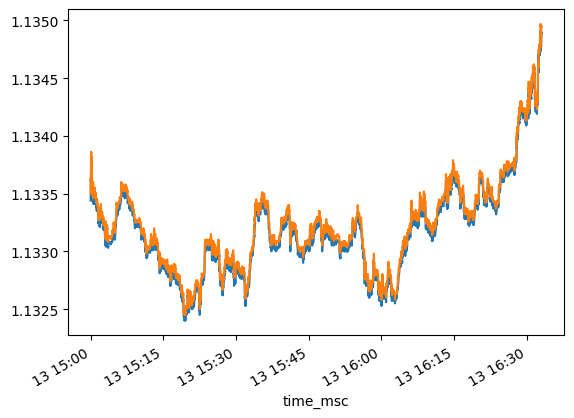

In [54]:
df['bid'].plot()
df['ask'].plot()

<Axes: xlabel='time_msc'>

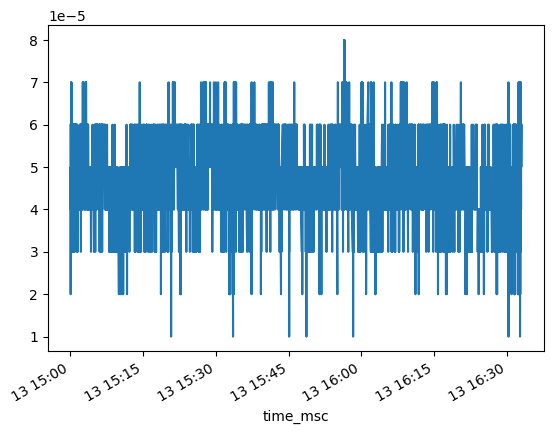

In [56]:
# Calcular la columna spread
df['spread'] = df['ask'] - df['bid']
df['spread'].plot()

In [58]:
# obtención de datos entre fechas7
df_2 = pd.DataFrame(mt5.copy_ticks_range(symbol, date_init, date_end, mt5.COPY_TICKS_ALL))
df_2['time_msc'] = pd.to_datetime(df_2['time_msc'], unit='ms')
df_2.set_index('time_msc', inplace=True)
df_2

,time,bid,ask,last,volume,flags,volume_real
time_msc,,,,,,,
2020-07-13 15:00:00.237,1594652400,1.13344,1.13350,0.0,0,134,0.0
2020-07-13 15:00:00.437,1594652400,1.13348,1.13353,0.0,0,134,0.0
2020-07-13 15:00:00.639,1594652400,1.13352,1.13357,0.0,0,134,0.0
2020-07-13 15:00:00.948,1594652400,1.13353,1.13358,0.0,0,134,0.0
2020-07-13 15:00:01.048,1594652401,1.13357,1.13362,0.0,0,134,0.0
...,...,...,...,...,...,...,...
2020-07-17 14:59:55.546,1594997995,1.14214,1.14218,0.0,0,134,0.0
2020-07-17 14:59:56.049,1594997996,1.14215,1.14220,0.0,0,134,0.0
2020-07-17 14:59:57.756,1594997997,1.14216,1.14220,0.0,0,130,0.0
